# Correlation of single cell morhologies and nELISA Cytokine/Chemokine Panel
Here we show the correlation bewteen single cell morhologies and nELISA Cytokine/Chemokine Panel.

In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyarrow.parquet as pq
import seaborn as sns

In [2]:
cell_type = "SHSY5Y"

In [3]:
# set path for sc data
sc_data_path = pathlib.Path(f"../data/{cell_type}_preprocessed_sc_norm.parquet")

# set path for nomic data
nomic_data_path = pathlib.Path(
    f"../2.Nomic_nELISA_Analysis/Data/clean/Plate2/nELISA_plate_430420_{cell_type}.csv"
)

In [4]:
# read in sc data
sc_data = pd.read_parquet(sc_data_path)

# read in nomic data
nomic_data = pd.read_csv(nomic_data_path)

In [5]:
# remove columns in nomic data that contain 'pgml'
nomic_data = nomic_data.loc[:, ~nomic_data.columns.str.contains("pgML")]

# drop the first 25 columns
nomic_data = nomic_data.drop(nomic_data.columns[3:25], axis=1)

# drop the first 3 columns
nomic_data = nomic_data.drop(nomic_data.columns[[0, 1]], axis=1)

In [6]:
# subset sc data to only have columns that contain 'Metadata'
sc_data_metadata = sc_data.loc[:, sc_data.columns.str.contains("Metadata")]
sc_data_metadata

# get the non metadata columns
sc_data_features = sc_data.loc[:, ~sc_data.columns.str.contains("Metadata")]
sc_data_features

sc_data_features = pd.concat(
    [sc_data_features, sc_data_metadata["Metadata_Well"]], axis=1
)
sc_data_features

# get aggregate mean of each well in sc_data_features
sc_data_features_agg = sc_data_features.groupby("Metadata_Well").mean()
# reset index
sc_data_features_agg = sc_data_features_agg.reset_index()

# merge the two dataframes on Metadata_Well
sc_data_features_agg = pd.merge(
    sc_data_features_agg,
    sc_data_metadata[
        ["oneb_Metadata_Treatment_Dose_Inhibitor_Dose", "Metadata_Well"]
    ].drop_duplicates(),
    on="Metadata_Well",
)
sc_data_features_agg

Metadata_Well  Cytoplasm_AreaShape_Compactness  \
0             B13                         0.000263   
1             B14                        -0.063223   
2             B15                        -0.062009   
3             B16                        -0.031699   
4             B17                        -0.045468   
..            ...                              ...   
149           O19                        -0.030737   
150           O20                        -0.008031   
151           O21                        -0.039158   
152           O22                        -0.078584   
153           O23                        -0.007559   

     Cytoplasm_AreaShape_Eccentricity  Cytoplasm_AreaShape_Extent  \
0                            0.050292                    0.011215   
1                           -0.001418                    0.035864   
2                            0.001236                    0.044042   
3                            0.047344                   -0.003990   
4                            0.038261                    0.034279   
..                                ...                         ...   
149                          0.025373                    0.019060   
150                          0.149927                   -0.087296   
151                          0.083196                   -0.033546   
152                          0.011797                    0.072764   
153                          0.060889                   -0.032769   

     Cytoplasm_AreaShape_FormFactor  Cytoplasm_AreaShape_MajorAxisLength  \
0                         -0.032031                             0.139148   
1                          0.036794                             0.037936   
2                          0.030464                            -0.002026   
3                          0.002975                             0.115183   
4                          0.023820                             0.163262   
..                              ...                                  ...   
149                        0.013307                             0.087081   
150                       -0.039525                             0.227378   
151                       -0.022291                             0.151747   
152                        0.058422                             0.033983   
153                       -0.010791                             0.024711   

     Cytoplasm_AreaShape_MinorAxisLength  Cytoplasm_AreaShape_Orientation  \
0                               0.092653                        -0.022733   
1                               0.031201                        -0.012884   
2                               0.006311                         0.010789   
3                               0.070404                        -0.007908   
4                               0.120615                        -0.000391   
..                                   ...                              ...   
149                             0.062723                         0.030207   
150                            -0.005209                         0.012483   
151                             0.022673                         0.001550   
152                             0.037911                         0.019646   
153                            -0.041600                         0.028661   

     Cytoplasm_AreaShape_Zernike_0_0  Cytoplasm_AreaShape_Zernike_1_1  ...  \
0                          -0.004550                        -0.019608  ...   
1                           0.028338                         0.019985  ...   
2                           0.030538                         0.022751  ...   
3                          -0.010212                        -0.004997  ...   
4                           0.018250                        -0.015776  ...   
..                               ...                              ...  ...   
149                         0.011448                        -0.006952  ...   
150                        -0.121338                        -0.0

In [7]:
# merge sc_data_features_agg and nomics_data on Metadata_Well and position_x
merged_data = pd.merge(
    sc_data_features_agg, nomic_data, left_on="Metadata_Well", right_on="position_x"
)
merged_data

Metadata_Well  Cytoplasm_AreaShape_Compactness  \
0             B13                         0.000263   
1             B14                        -0.063223   
2             B15                        -0.062009   
3             B16                        -0.031699   
4             B17                        -0.045468   
..            ...                              ...   
149           O19                        -0.030737   
150           O20                        -0.008031   
151           O21                        -0.039158   
152           O22                        -0.078584   
153           O23                        -0.007559   

     Cytoplasm_AreaShape_Eccentricity  Cytoplasm_AreaShape_Extent  \
0                            0.050292                    0.011215   
1                           -0.001418                    0.035864   
2                            0.001236                    0.044042   
3                            0.047344                   -0.003990   
4                            0.038261                    0.034279   
..                                ...                         ...   
149                          0.025373                    0.019060   
150                          0.149927                   -0.087296   
151                          0.083196                   -0.033546   
152                          0.011797                    0.072764   
153                          0.060889                   -0.032769   

     Cytoplasm_AreaShape_FormFactor  Cytoplasm_AreaShape_MajorAxisLength  \
0                         -0.032031                             0.139148   
1                          0.036794                             0.037936   
2                          0.030464                            -0.002026   
3                          0.002975                             0.115183   
4                          0.023820                             0.163262   
..                              ...                                  ...   
149                        0.013307                             0.087081   
150                       -0.039525                             0.227378   
151                       -0.022291                             0.151747   
152                        0.058422                             0.033983   
153                       -0.010791                             0.024711   

     Cytoplasm_AreaShape_MinorAxisLength  Cytoplasm_AreaShape_Orientation  \
0                               0.092653                        -0.022733   
1                               0.031201                        -0.012884   
2                               0.006311                         0.010789   
3                               0.070404                        -0.007908   
4                               0.120615                        -0.000391   
..                                   ...                              ...   
149                             0.062723                         0.030207   
150                            -0.005209                         0.012483   
151                             0.022673                         0.001550   
152                             0.037911                         0.019646   
153                            -0.041600                         0.028661   

     Cytoplasm_AreaShape_Zernike_0_0  Cytoplasm_AreaShape_Zernike_1_1  ...  \
0                          -0.004550                        -0.019608  ...   
1                           0.028338                         0.019985  ...   
2                           0.030538                         0.022751  ...   
3                          -0.010212                        -0.004997  ...   
4                           0.018250                        -0.015776  ...   
..                               ...                              ...  ...   
149                         0.011448                        -0.006952  ...   
150                        -0.121338                        -0.0

In [8]:
# drop position_x column and metadata_well
merged_data = merged_data.drop(["position_x", "Metadata_Well"], axis=1)
merged_data

Cytoplasm_AreaShape_Compactness  Cytoplasm_AreaShape_Eccentricity  \
0                           0.000263                          0.050292   
1                          -0.063223                         -0.001418   
2                          -0.062009                          0.001236   
3                          -0.031699                          0.047344   
4                          -0.045468                          0.038261   
..                               ...                               ...   
149                        -0.030737                          0.025373   
150                        -0.008031                          0.149927   
151                        -0.039158                          0.083196   
152                        -0.078584                          0.011797   
153                        -0.007559                          0.060889   

     Cytoplasm_AreaShape_Extent  Cytoplasm_AreaShape_FormFactor  \
0                      0.011215                       -0.032031   
1                      0.035864                        0.036794   
2                      0.044042                        0.030464   
3                     -0.003990                        0.002975   
4                      0.034279                        0.023820   
..                          ...                             ...   
149                    0.019060                        0.013307   
150                   -0.087296                       -0.039525   
151                   -0.033546                       -0.022291   
152                    0.072764                        0.058422   
153                   -0.032769                       -0.010791   

     Cytoplasm_AreaShape_MajorAxisLength  Cytoplasm_AreaShape_MinorAxisLength  \
0                               0.139148                             0.092653   
1                               0.037936                             0.031201   
2                              -0.002026                             0.006311   
3                               0.115183                             0.070404   
4                               0.163262                             0.120615   
..                                   ...                                  ...   
149                             0.087081                             0.062723   
150                             0.227378                            -0.005209   
151                             0.151747                             0.022673   
152                             0.033983                             0.037911   
153                             0.024711                            -0.041600   

     Cytoplasm_AreaShape_Orientation  Cytoplasm_AreaShape_Zernike_0_0  \
0                          -0.022733                        -0.004550   
1                          -0.012884                         0.028338   
2                           0.010789                         0.030538   
3                          -0.007908                        -0.010212   
4                          -0.000391                         0.018250   
..                               ...                              ...   
149                         0.030207                         0.011448   
150                         0.012483                        -0.121338   
151                         0.001550                        -0.070861   
152                         0.019646                         0.063310   
153                         0.028661                        -0.029501   

     Cytoplasm_AreaShape_Zernike_1_1  Cytoplasm_AreaShape_Zernike_2_0  ...  \
0                          -0.019608                         0.030791  ...   
1                           0.019985                         0.020941  ...   
2                           0.022751                         0.021311  ...   
3                          -0.004997                         0.067747  ...   
4                          -0.015776                         0.079127  

In [9]:
# aggregate the data by treatment dose
merged_data_agg = merged_data.groupby(
    "oneb_Metadata_Treatment_Dose_Inhibitor_Dose"
).mean()
print(merged_data_agg.shape)

(36, 1438)


In [10]:
# reset index
merged_data_agg = merged_data_agg.reset_index()
merged_data_agg.head()

oneb_Metadata_Treatment_Dose_Inhibitor_Dose  \
0                       DMSO_0.100_DMSO_0.025   
1                         DMSO_0.100_DMSO_1.0   
2                  DMSO_0.100_Z-VAD-FMK_100.0   
3                   DMSO_0.100_Z-VAD-FMK_30.0   
4                 Disulfiram_0.100_DMSO_0.025   

   Cytoplasm_AreaShape_Compactness  Cytoplasm_AreaShape_Eccentricity  \
0                         0.000266                          0.000795   
1                        -0.035458                          0.023364   
2                        -0.046265                          0.023056   
3                        -0.021474                         -0.000433   
4                         0.009733                          0.058170   

   Cytoplasm_AreaShape_Extent  Cytoplasm_AreaShape_FormFactor  \
0                   -0.000488                       -0.000356   
1                    0.052148                        0.029367   
2                    0.065217                        0.029806   
3                    0.022876                        0.006938   
4                    0.010962                       -0.026338   

   Cytoplasm_AreaShape_MajorAxisLength  Cytoplasm_AreaShape_MinorAxisLength  \
0                             0.001520                             0.000625   
1                             0.041366                             0.016403   
2                             0.040247                             0.017206   
3                             0.044004                             0.040000   
4                             0.255836                             0.192793   

   Cytoplasm_AreaShape_Orientation  Cytoplasm_AreaShape_Zernike_0_0  \
0                         0.000161                        -0.000756   
1                         0.008860                         0.031352   
2                         0.004205                         0.042901   
3                         0.013727                         0.021675   
4                         0.008763                        -0.016553   

   Cytoplasm_AreaShape_Zernike_1_1  ...  TWEAK [NSU]  uPA [NSU]  VCAM-1 [NSU]  \
0                        -0.000253  ...    -0.572441   1.503600      0.127039   
1                         0.013032  ...    -1.548683   1.941367      0.025042   
2                         0.006149  ...    -1.296443   2.754936     -0.333431   
3                         0.004213  ...    -0.818054   1.791053     -0.108643   
4                        -0.023731  ...    -0.979011   1.878072     -0.314149   

   VEGF Receptor 2 (Flk-1) [NSU]  VEGF-A (165) [NSU]  VEGF-C [NSU]  \
0                      -1.063768           32.496061     -0.677873   
1                      -0.428051           31.133640     -1.082772   
2                      -0.553864           31.323067     -0.448866   
3                      -0.992781           33.094425     -1.566848   
4                      -0.016217           33.712901     -0.985463   

   VEGF-D [NSU]  VEGFR-1 [NSU]  WISP-1 (CCN4) [NSU]  XCL1 (Lymphotactin) [NSU]  
0     -0.421655       0.406512             0.375012                  -0.621195  
1     -0.448549      -0.486683            -0.862224                   0.404772  
2     -0.426280      -0.557675            -0.872286                  -1.347264  
3     -0.171816      -0.408105             0.395926                  -0.091528  
4     -0.800393       0.033327             0.242332                   0.172711  

[5 rows x 1439 columns]

In [11]:
# make a blank df
corr_matrix_df = pd.DataFrame(
    columns=["feature", "feature2", "correlation", "treatment", "well"]
)

In [12]:
corr_matrix_df

Empty DataFrame
Columns: [feature, feature2, correlation, treatment, well]
Index: []

In [55]:
treatment = "DMSO_0.100_DMSO_0.025"
# treatment = 'DMSO_0.100_Z-VAD-FMK_100.0'
print(treatment)
# get the row
tmpdf = merged_data_agg.loc[
    merged_data_agg["oneb_Metadata_Treatment_Dose_Inhibitor_Dose"] == treatment
]
tmpdf
# get the correlation between the sc data and nomic data for well B13
# tmpdf = merged_data_agg.drop(['oneb_Metadata_Treatment_Dose_Inhibitor_Dose'], axis=1)
# tmpdf = tmpdf.corr()
# # drop sc data columns correlation to sc data columns
# tmpdf = tmpdf.iloc[0:sc_data_features_agg.shape[1]-2, sc_data_features_agg.shape[1]-2:]
# tmpdf = tmpdf.reset_index()
# tmpdf = tmpdf.rename(columns={'index': 'feature'})
# # save the correlation matrix to a csv

# # melt the correlation matrix
# corr_matrix_melted = tmpdf.reset_index().melt(id_vars='feature', value_vars=tmpdf.columns[1:])
# corr_matrix_melted = corr_matrix_melted.rename(columns={'index': 'feature', 'variable': 'feature2', 'value': 'correlation'})


# # find the treatment dose for well B13 in sc_data_metadata

# corr_matrix_melted['treatment'] = treatment
# corr_matrix_melted.to_csv(f'{cell_type}_{treatment}_correlation_matrix.csv')
# # change corralted values that are abs less than 0.5 to 0
# corr_matrix_melted.loc[abs(corr_matrix_melted['correlation']) < 0.5, 'correlation'] = 0
# # remove rows that contain all 0s
# corr_matrix_melted = corr_matrix_melted.loc[~(corr_matrix_melted==0).all(axis=1)]
# # remove all columns that contain all 0s
# corr_matrix_melted = corr_matrix_melted.loc[:, (corr_matrix_melted!=0).any(axis=0)]
# # set pivot table for corr_matrix_melted
# corr_matrix_melted
# # sc_data_features_agg
# corr_matrix_pivot = corr_matrix_melted.pivot_table(index=['feature'], columns='feature2', values='correlation')
# # remove rows that contain all 0s
# corr_matrix_pivot = corr_matrix_pivot.loc[~(corr_matrix_pivot==0).all(axis=1)]
# # remove all columns that contain all 0s
# corr_matrix_pivot = corr_matrix_pivot.loc[:, (corr_matrix_pivot!=0).any(axis=0)]
# # plot the pivot table
# # plt.figure(figsize=(40, 40))
# # sns.heatmap(corr_matrix_pivot, cmap='coolwarm', vmin=-1, vmax=1)
# # plt.show()
# corr_matrix_pivot['Activin A [NSU]'].unique()

DMSO_0.100_DMSO_0.025


oneb_Metadata_Treatment_Dose_Inhibitor_Dose  \
0                       DMSO_0.100_DMSO_0.025   

   Cytoplasm_AreaShape_Compactness  Cytoplasm_AreaShape_Eccentricity  \
0                         0.000266                          0.000795   

   Cytoplasm_AreaShape_Extent  Cytoplasm_AreaShape_FormFactor  \
0                   -0.000488                       -0.000356   

   Cytoplasm_AreaShape_MajorAxisLength  Cytoplasm_AreaShape_MinorAxisLength  \
0                              0.00152                             0.000625   

   Cytoplasm_AreaShape_Orientation  Cytoplasm_AreaShape_Zernike_0_0  \
0                         0.000161                        -0.000756   

   Cytoplasm_AreaShape_Zernike_1_1  ...  TWEAK [NSU]  uPA [NSU]  VCAM-1 [NSU]  \
0                        -0.000253  ...    -0.572441     1.5036      0.127039   

   VEGF Receptor 2 (Flk-1) [NSU]  VEGF-A (165) [NSU]  VEGF-C [NSU]  \
0                      -1.063768           32.496061     -0.677873   

   VEGF-D [NSU]  VEGFR-1 [NSU]  WISP-1 (CCN4) [NSU]  XCL1 (Lymphotactin) [NSU]  
0     -0.421655       0.406512             0.375012                  -0.621195  

[1 rows x 1439 columns]

DMSO_0.100_DMSO_0.025


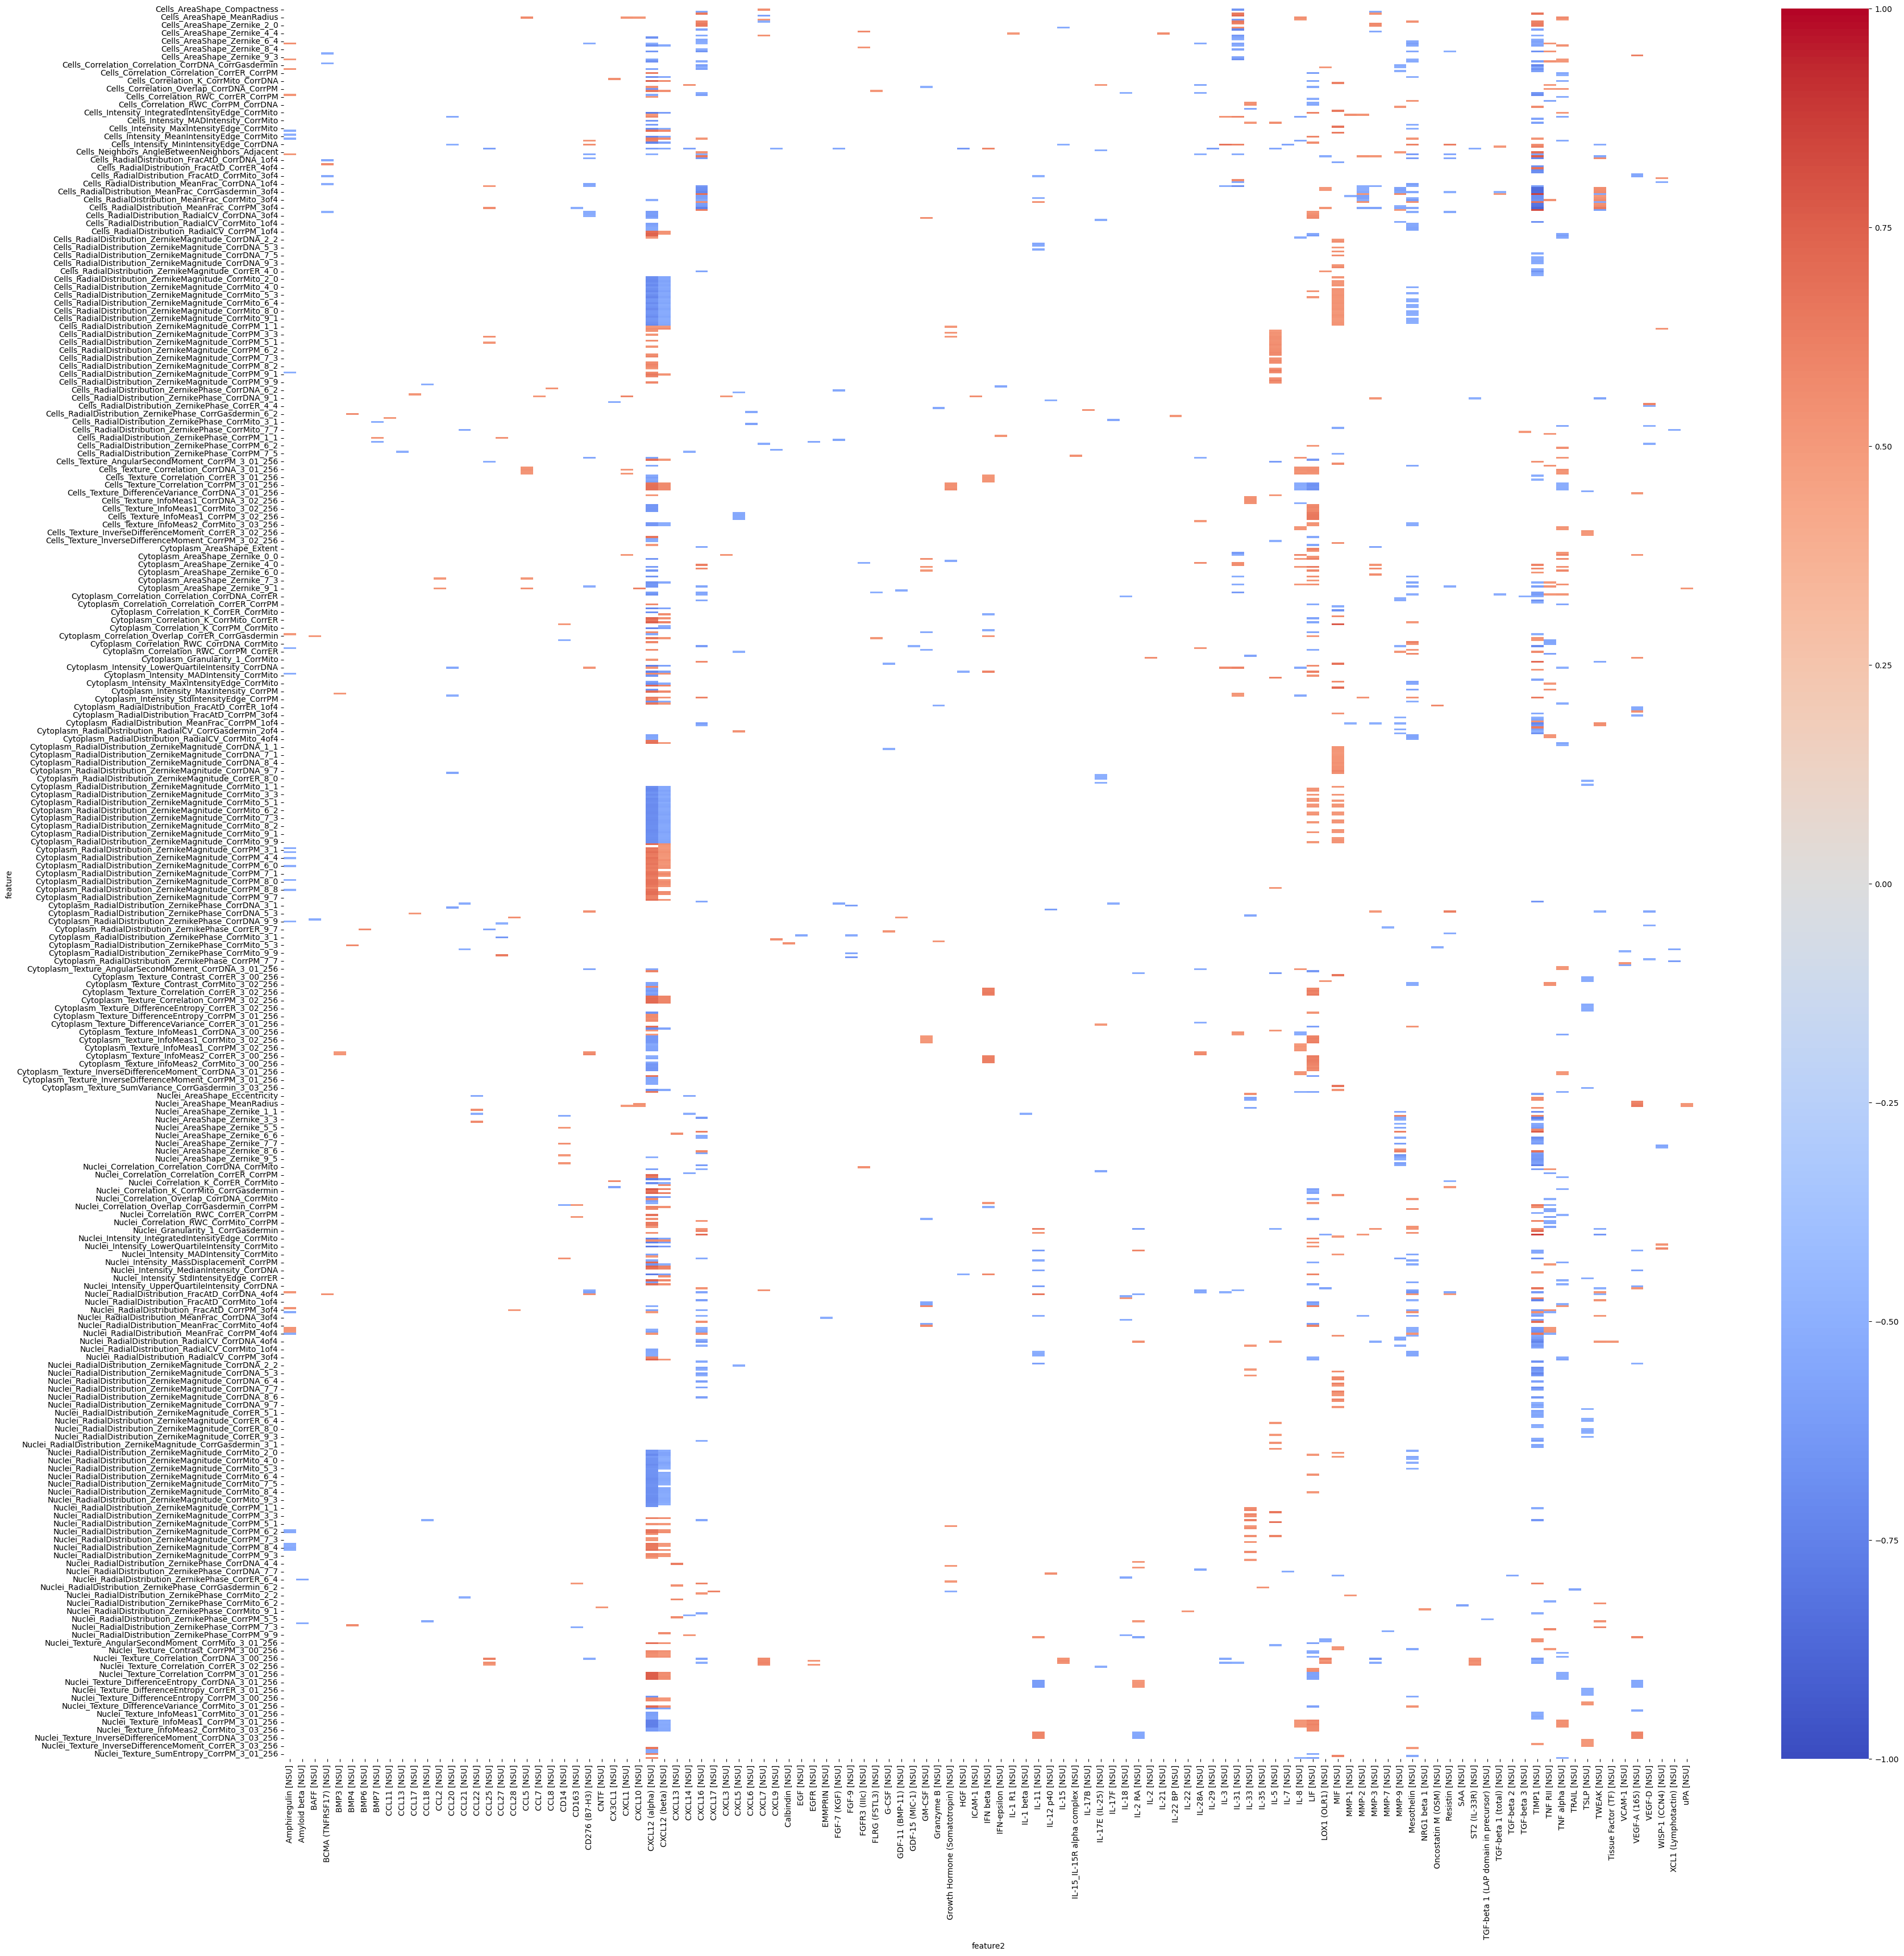

DMSO_0.100_DMSO_1.0


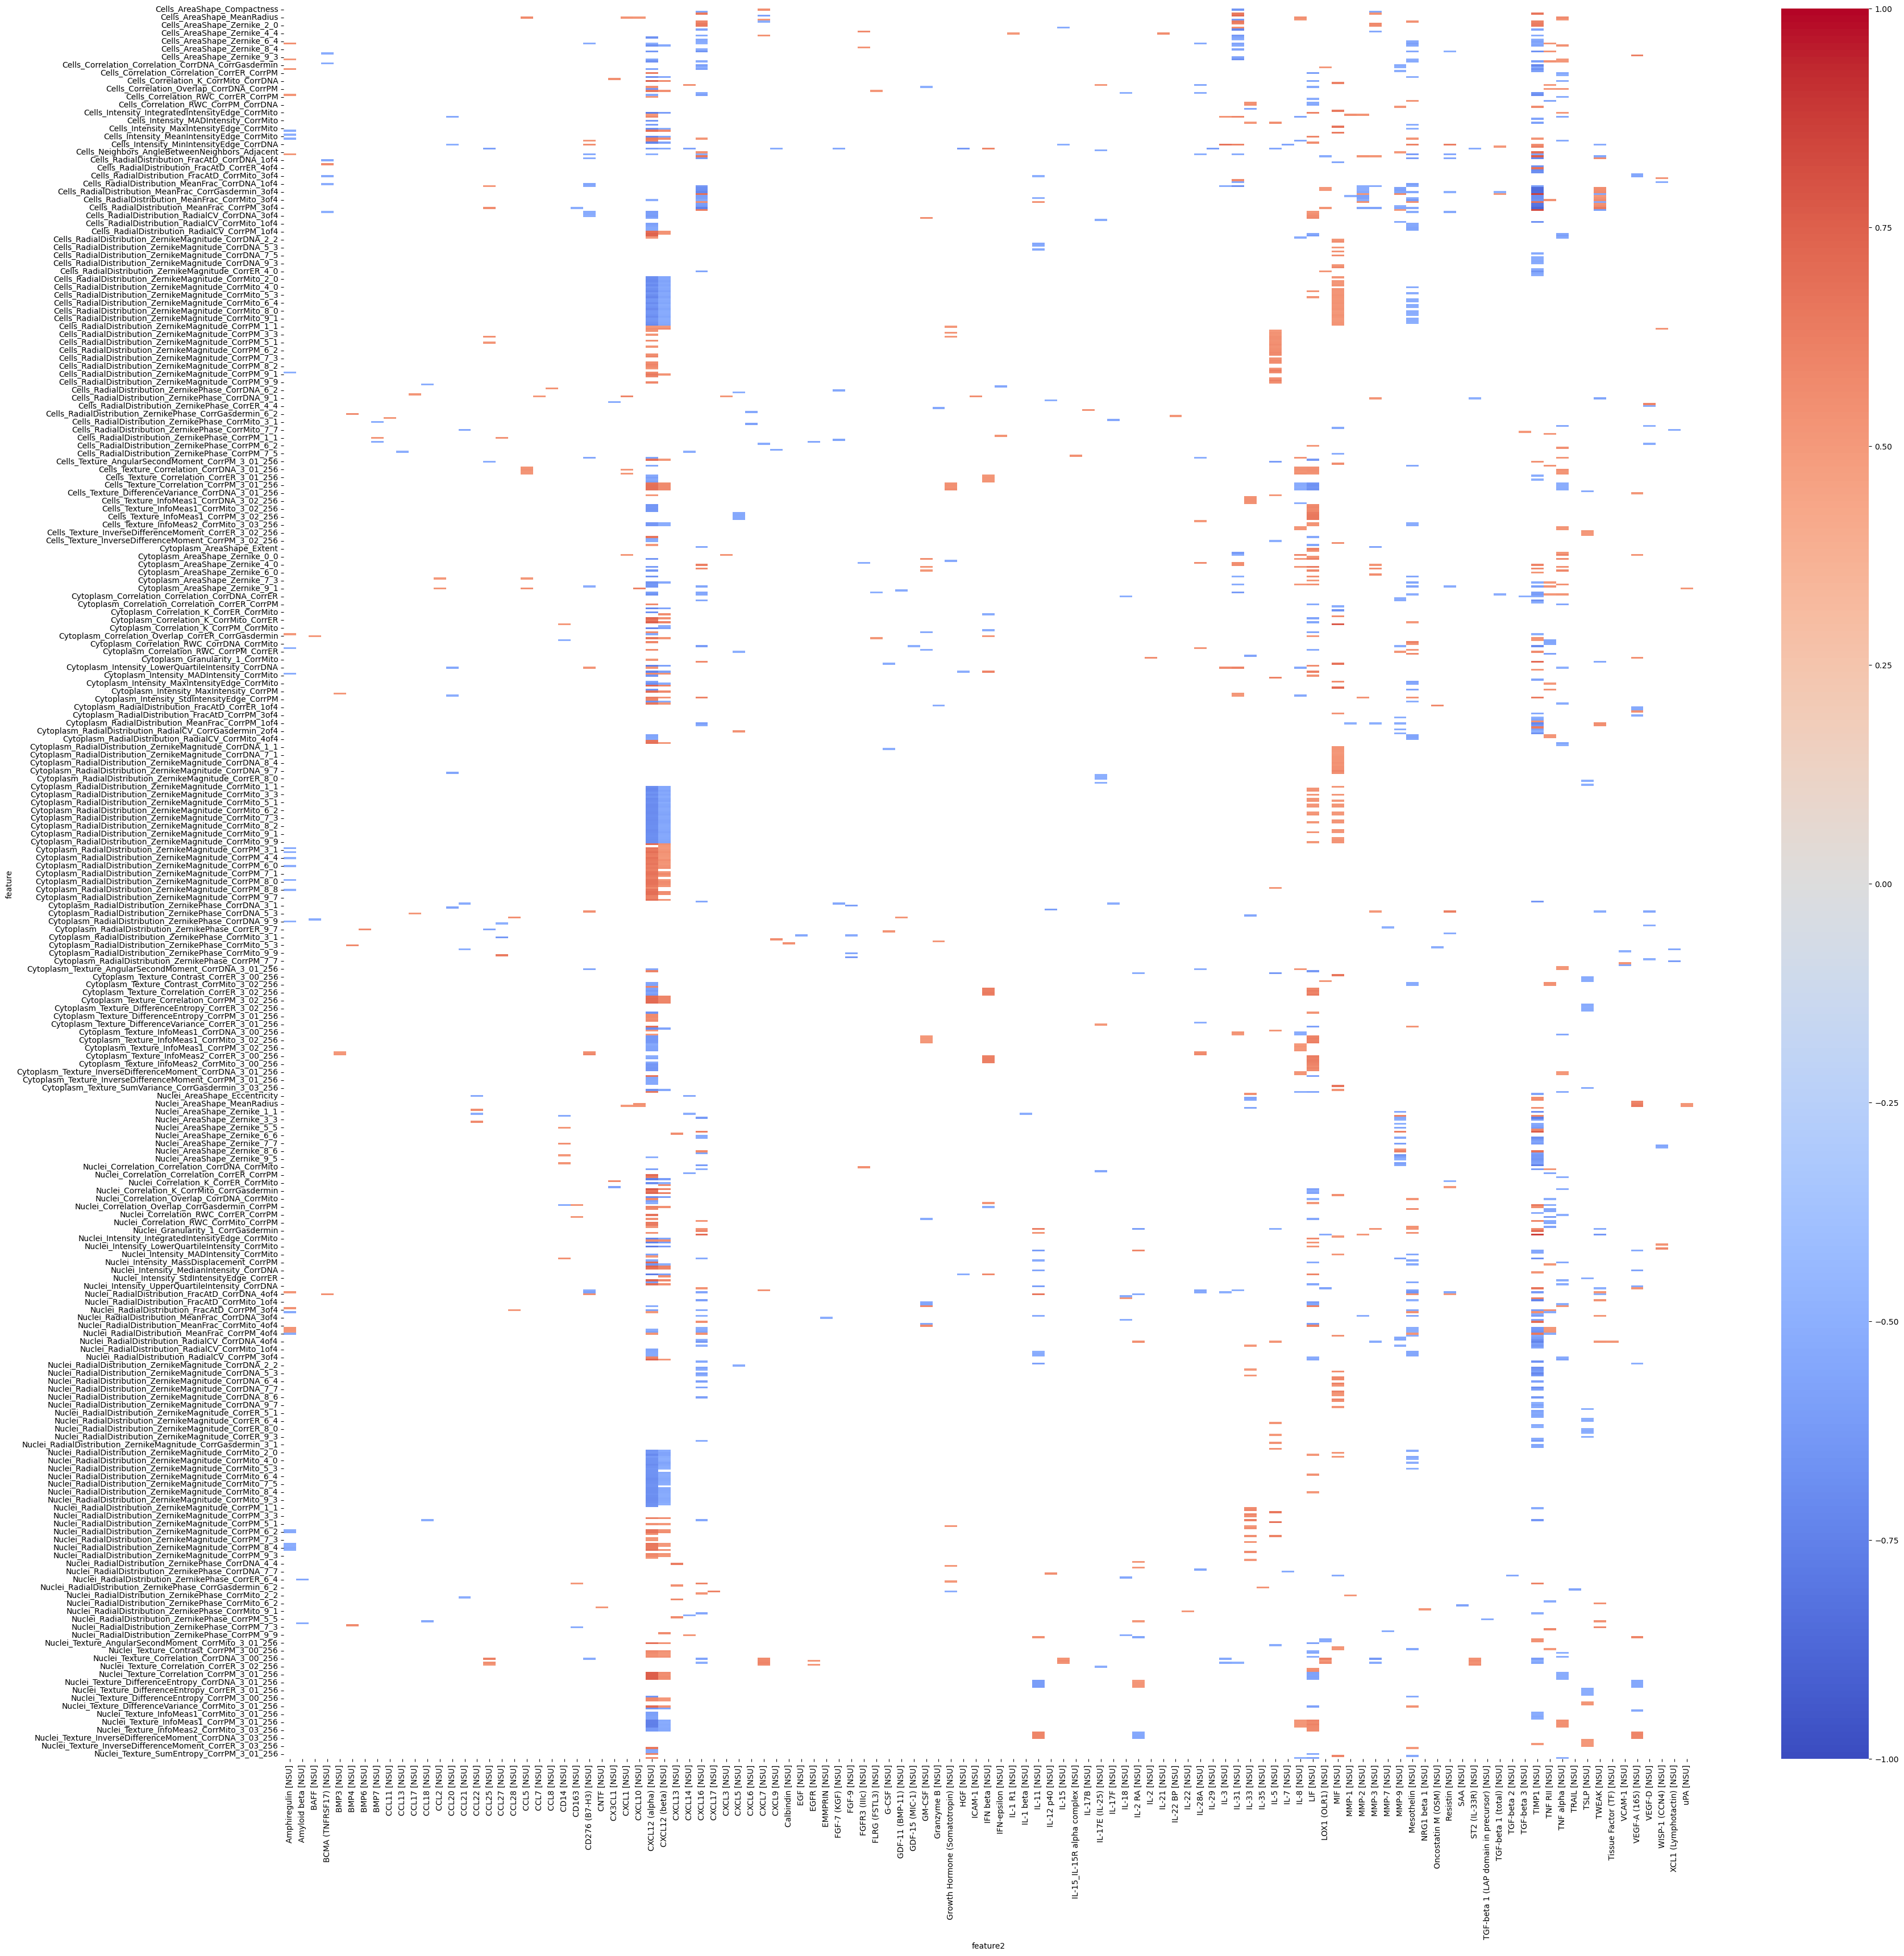

DMSO_0.100_Z-VAD-FMK_100.0


KeyboardInterrupt: 

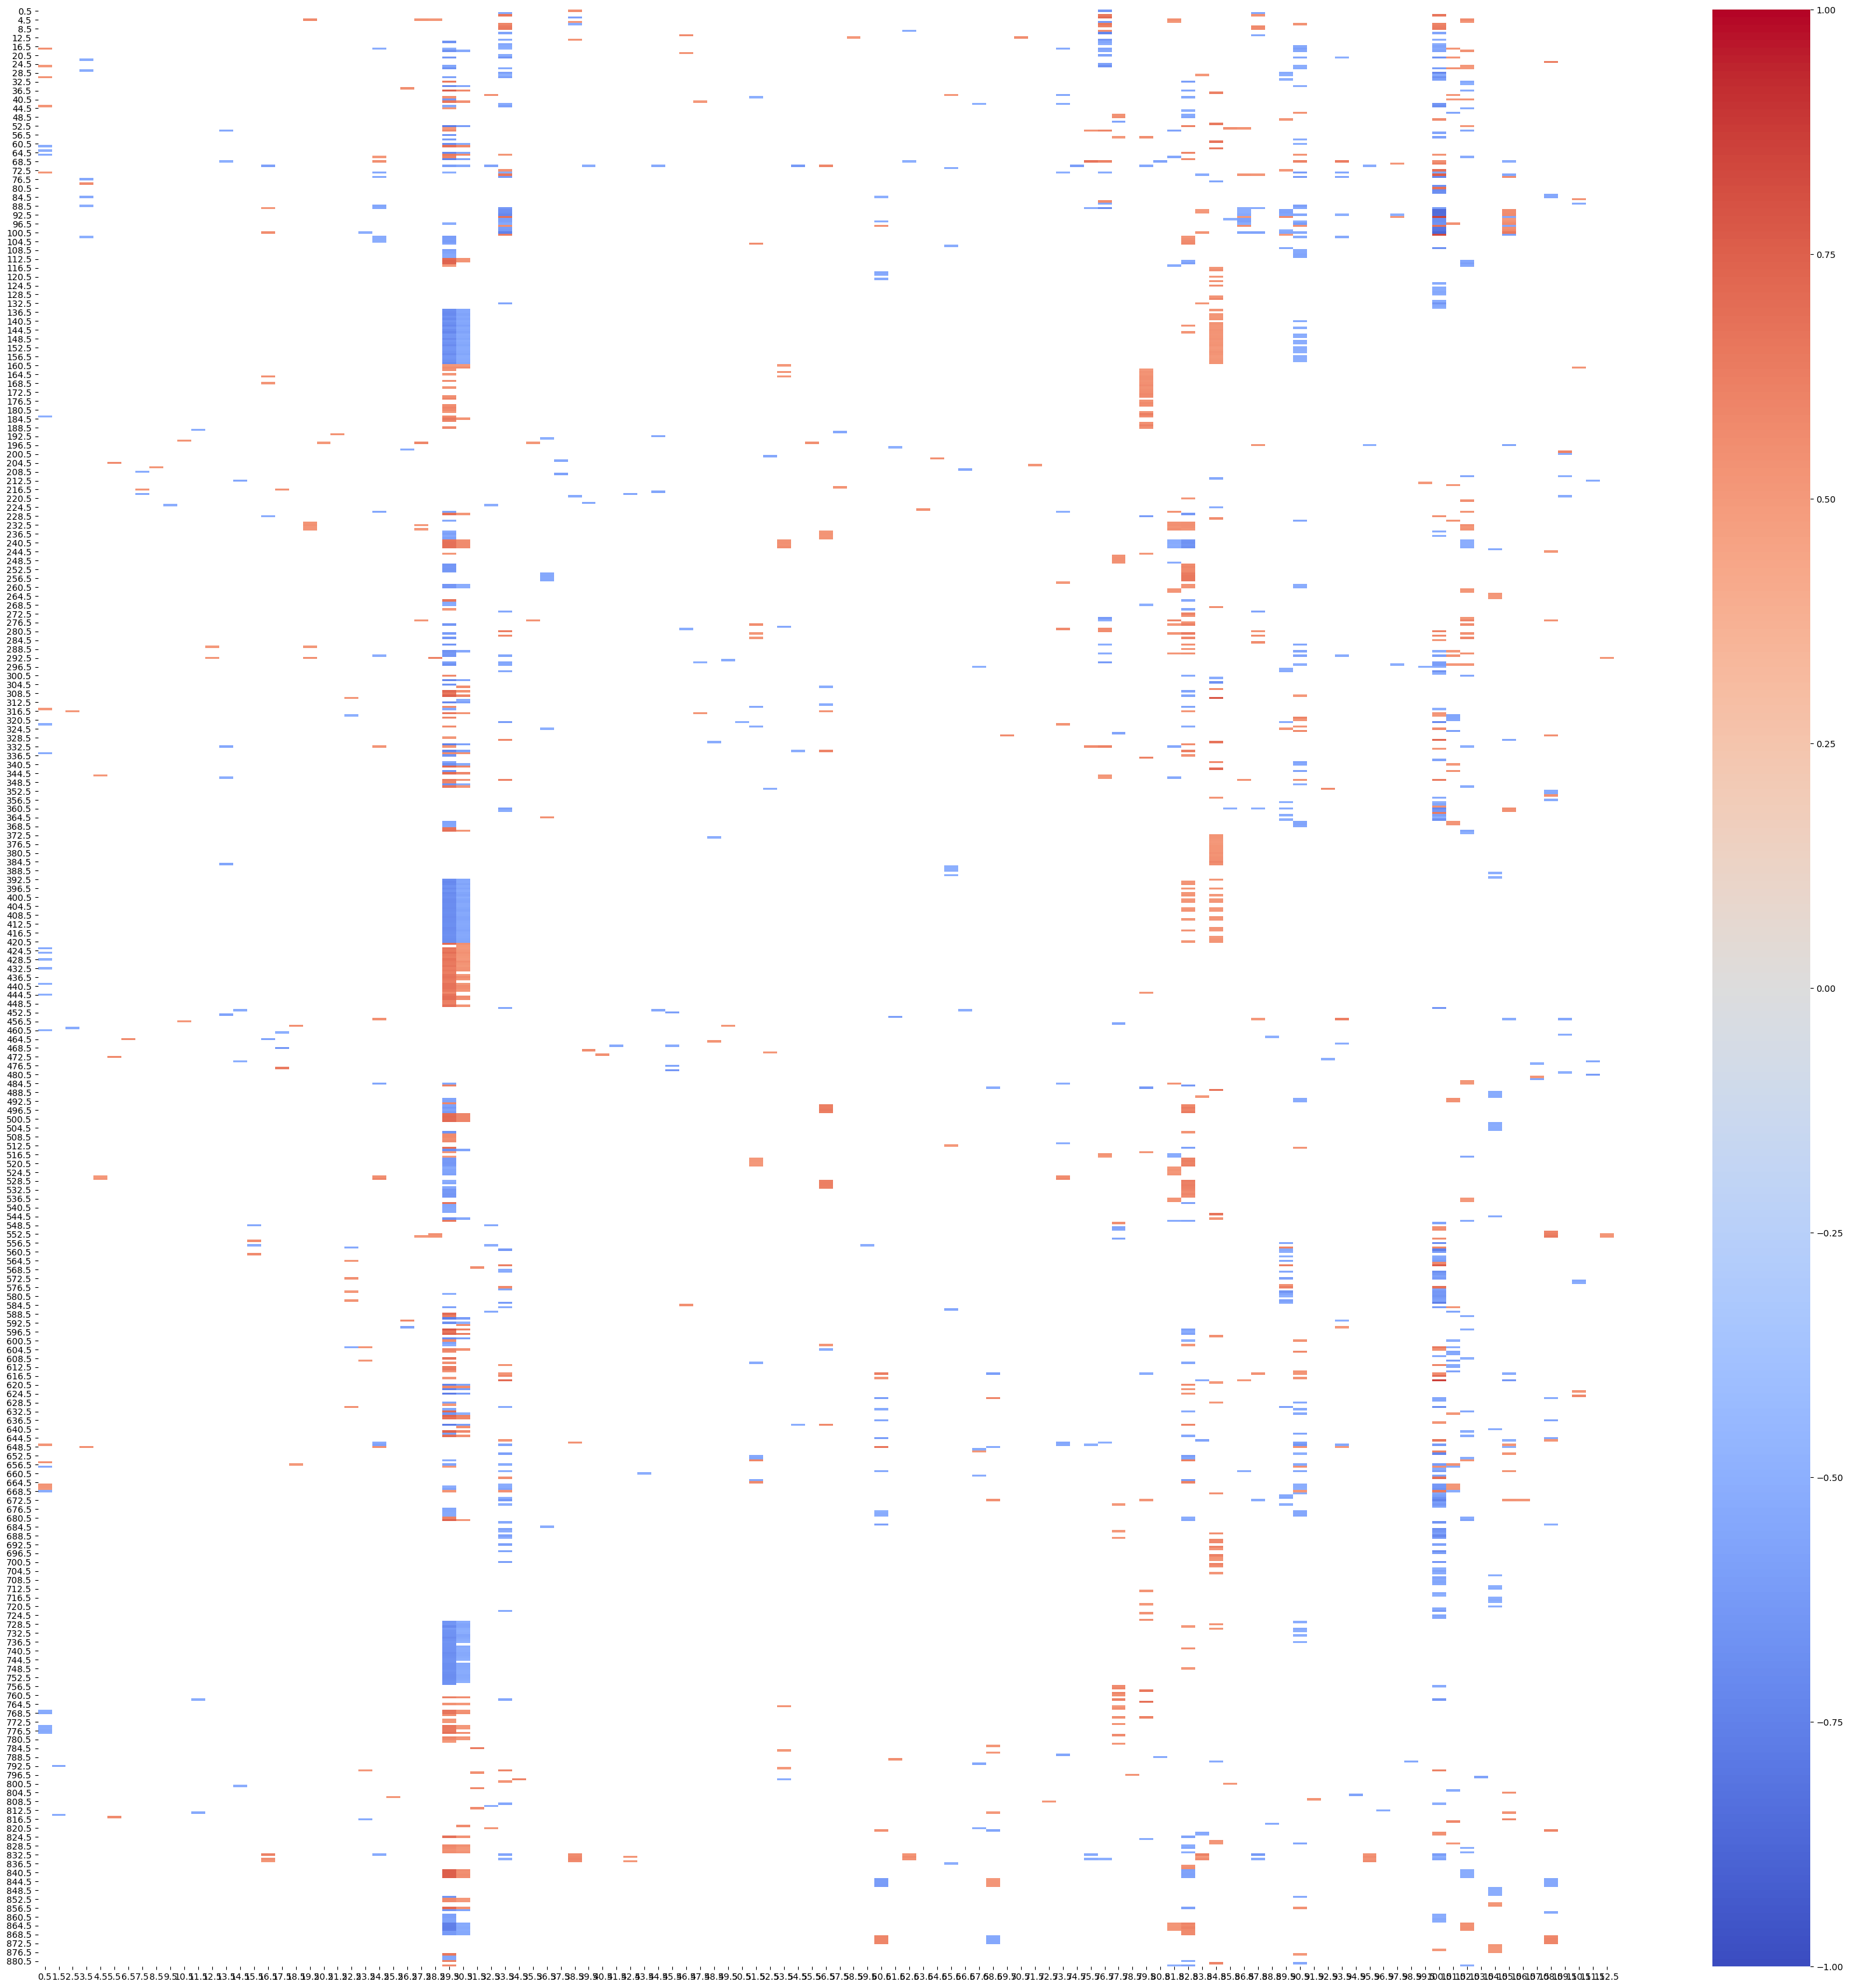

In [15]:
for treatment in merged_data_agg[
    "oneb_Metadata_Treatment_Dose_Inhibitor_Dose"
].unique():
    print(treatment)
    # get the row
    tmpdf = merged_data_agg.loc[
        merged_data_agg["oneb_Metadata_Treatment_Dose_Inhibitor_Dose"] == treatment
    ]
    # get the correlation between the sc data and nomic data for well B13
    tmpdf = merged_data_agg.drop(
        ["oneb_Metadata_Treatment_Dose_Inhibitor_Dose"], axis=1
    )
    tmpdf = tmpdf.corr()
    # drop sc data columns correlation to sc data columns
    tmpdf = tmpdf.iloc[
        0 : sc_data_features_agg.shape[1], sc_data_features_agg.shape[1] :
    ]
    tmpdf = tmpdf.reset_index()
    tmpdf = tmpdf.rename(columns={"index": "feature"})
    # save the correlation matrix to a csv

    # # melt the correlation matrix
    corr_matrix_melted = tmpdf.reset_index().melt(
        id_vars="feature", value_vars=tmpdf.columns[1:]
    )
    corr_matrix_melted = corr_matrix_melted.rename(
        columns={"index": "feature", "variable": "feature2", "value": "correlation"}
    )

    # # find the treatment dose for well B13 in sc_data_metadata

    corr_matrix_melted["treatment"] = treatment
    corr_matrix_melted.to_csv(f"{cell_type}_{treatment}_correlation_matrix.csv")
    # filter out the correlation values that are less than abs 0.5
    corr_matrix_melted = corr_matrix_melted.loc[
        abs(corr_matrix_melted["correlation"]) > 0.5
    ]
    # remove rows and columns that contain all NaNs
    corr_matrix_melted = corr_matrix_melted.dropna(axis=0, how="all")
    # set pivot table for corr_matrix_melted
    corr_matrix_pivot = corr_matrix_melted.pivot_table(
        index=["feature"], columns="feature2", values="correlation"
    )
    # plot the pivot table
    plt.figure(figsize=(40, 40))
    sns.heatmap(corr_matrix_pivot, cmap="coolwarm", vmin=-1, vmax=1)
    plt.show()

In [ ]:
corr_matrix_df
# aggreate corr_matrix_df by treatment
corr_matrix_df_agg = corr_matrix_df.groupby("treatment").mean()

In [17]:
corr_matrix_df

feature  \
0                         Cytoplasm_AreaShape_Compactness   
1                        Cytoplasm_AreaShape_Eccentricity   
2                              Cytoplasm_AreaShape_Extent   
3                          Cytoplasm_AreaShape_FormFactor   
4                     Cytoplasm_AreaShape_MajorAxisLength   
...                                                   ...   
233932  Nuclei_Texture_InverseDifferenceMoment_CorrPM_...   
233933          Nuclei_Texture_SumEntropy_CorrPM_3_01_256   
233934  Nuclei_Texture_SumVariance_CorrGasdermin_3_01_256   
233935       Nuclei_Texture_SumVariance_CorrMito_3_03_256   
233936         Nuclei_Texture_SumVariance_CorrPM_3_03_256   

                         feature2  correlation                  treatment well  
0                 Activin A [NSU]     0.063504  media ctr_0_Media ctr_0.0  B13  
1                 Activin A [NSU]     0.010528  media ctr_0_Media ctr_0.0  B13  
2                 Activin A [NSU]    -0.056456  media ctr_0_Media ctr_0.0  B13  
3                 Activin A [NSU]    -0.021268  media ctr_0_Media ctr_0.0  B13  
4                 Activin A [NSU]    -0.071086  media ctr_0_Media ctr_0.0  B13  
...                           ...          ...                        ...  ...  
233932  XCL1 (Lymphotactin) [NSU]     0.021980  media ctr_0_Media ctr_0.0  O23  
233933  XCL1 (Lymphotactin) [NSU]    -0.004003  media ctr_0_Media ctr_0.0  O23  
233934  XCL1 (Lymphotactin) [NSU]    -0.065635  media ctr_0_Media ctr_0.0  O23  
233935  XCL1 (Lymphotactin) [NSU]    -0.017005  media ctr_0_Media ctr_0.0  O23  
233936  XCL1 (Lymphotactin) [NSU]    -0.079787  media ctr_0_Media ctr_0.0  O23  

[36260235 rows x 5 columns]

ValueError: could not convert string to float: 'Cytoplasm_AreaShape_Compactness'

In [ ]:
# get the row that is well B13
tmpdf = merged_data.loc[merged_data["position_x"] == "B13"]
# get the correlation between the sc data and nomic data for well B13
tmpdf = merged_data.drop(["position_x"], axis=1)
tmpdf = tmpdf.corr()
# drop sc data columns correlation to sc data columns
tmpdf = tmpdf.iloc[0 : sc_data_features_agg.shape[1], sc_data_features_agg.shape[1] :]
tmpdf = tmpdf.reset_index()
tmpdf = tmpdf.rename(columns={"index": "feature"})
# save the correlation matrix to a csv
# tmpdf.to_csv(f'{cell_type}_B13_correlation_matrix.csv')

In [ ]:
# melt the correlation matrix
corr_matrix_melted = tmpdf.reset_index().melt(id_vars="index")
corr_matrix_melted = corr_matrix_melted.rename(
    columns={"index": "feature", "variable": "feature2", "value": "correlation"}
)
corr_matrix_melted


# find the treatment dose for well B13 in sc_data_metadata
corr_matrix_melted["treatment"] = sc_data_metadata.loc[
    sc_data_metadata["Metadata_Well"] == "B13"
]["oneb_Metadata_Treatment_Dose_Inhibitor_Dose"].values[0]
corr_matrix_melted["well"] = "B13"
# add the treatment dose to merged_data
# tmpdf['oneb_Metadata_Treatment_Dose_Inhibitor_Dose'] = sc_data_metadata['oneb_Metadata_Treatment_Dose_Inhibitor_Dose'].values
corr_matrix_melted.head()

In [ ]:
# drop sc data columns correlation to sc data columns
corr_matrix = corr_matrix.iloc[
    0 : sc_data_features_agg.shape[1], sc_data_features_agg.shape[1] :
]

In [ ]:
# fig save path
fig_save_path = pathlib.Path("./Figures/feature_nomic_correlation")
# create the directory if it doesn't exist
fig_save_path.mkdir(parents=True, exist_ok=True)

In [ ]:
# make correlation values that are less than abs 0.5 to 0
corr_matrix[abs(corr_matrix) < 0.5] = 0
# drop rows that are all 0
corr_matrix = corr_matrix.loc[(corr_matrix != 0).any(axis=1)]
# drop columns that are all 0
corr_matrix = corr_matrix.loc[:, (corr_matrix != 0).any(axis=0)]
# sort rows by highest correlation to lowest
corr_matrix = corr_matrix.reindex(
    corr_matrix.abs().sort_values(by="TNF alpha [NSU]", ascending=False).index
)
corr_matrix

In [ ]:
# heatmap of corr_matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")

In [ ]:
# heatmap of corr_matrix with seaborn clustermap function
# hierarchical clustering is performed on rows and columns
# sorted by similarity of their profiles (rows and columns)
# set fig size 8.5 x 11
# use fastcluster to speed up clustering
# use euclidean distance metric
sns.clustermap(
    corr_matrix,
    figsize=(50, 50),
    method="average",
    metric="euclidean",
    cmap="RdYlBu_r",
    linewidths=0,
    linecolor="black",
)
plt.savefig(pathlib.Path(f"{fig_save_path}/{cell_type}_clustermap.png"))
plt.show()